<a href="https://colab.research.google.com/github/DmitryKutsev/ml_hw/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-13 06:20:39--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.7MB/s    in 5.1s    

2020-02-13 06:20:45 (15.7 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
!ls
!gunzip aclImdb_v1.tar.gz
!tar -xvf aclImdb_v1.tar 

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/4

In [0]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

In [260]:
import os
texts, bin_labels = [], []
for text in os.listdir('aclImdb/train/pos'):
  with open('aclImdb/train/pos/' + str(text), 'r') as handler:
    texts.append(handler.read())
    bin_labels.append(1)
handler.close()

for text in os.listdir('aclImdb/train/neg'):
  with open('aclImdb/train/neg/' + str(text), 'r') as handler:
    texts.append(handler.read())
    bin_labels.append(0)
handler.close()
print(texts[-1])
print(labels[-1])
bin_labels[-1]

A difficult film to categorize. I was never giving it 110% concentration & consequently as simple as the plot appeared I couldn't say for certain exactly who was doing what amongst the American FBI characters & what their roles were. Nor could I take the Irwins seriously as film characters when their lines & scenes were all in the style of one of his shows, not acted out.<br /><br />This is nothing more than a glorified episode of a Discovery TV show, with a largely insignificant sub plot going on, which just seemed to get in the way. However as any Irwin show is always worth a watch, this film is well worth a look too, but not on Christmas Day. Talking of which, I've better things to do too than be on here.<br /><br />A high 4/10
negative


0

In [261]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(texts) #Learn the vocabulary dictionary and return term-document matrix.
X_train_counts.shape

(25000, 74849)

In [262]:
import os
test_texts, bin_test_labels = [], []
for text in os.listdir('aclImdb/test/pos'):
  with open('aclImdb/test/pos/' + str(text), 'r') as handler:
    test_texts.append(handler.read())
    bin_test_labels.append(1)
handler.close()

for text in os.listdir('aclImdb/test/neg'):
  with open('aclImdb/test/neg/' + str(text), 'r') as handler:
    test_texts.append(handler.read())
    bin_test_labels.append(0)
handler.close()
print(test_texts[-1])
print(test_labels[-1])
bin_test_labels[-1]

Talk about marketing. The poster/home video cover of 'The New Twenty' broadcasts a half-naked male in a "Wolfe Video." For those familiar with the gay-themed movies  this broadcasts a "must-see." (I loved reading one reviewer (from another site) stating they had been "tricked" into seeing a "Sodomite" movie. Are you serious? The tagline itself as the word "gay." The Lord gives you eyes, yet you cannot see) That being said, despite the number of gay characters, stereotyped, no less (see: the lonely gay, the AIDS victim gay and the closeted gay) it's more about long-term friendship and characters that grow apart. In fact, if anything, there's more (here's one for Christians to complain about) heterosexual couples having sex outside of, gasp!, marriage. Not to mention backstabbing, drinking to excess and drug usage. I see this more of a made for TV-Logo or Showtime movie than big screen effort. Sure, I loved the cinematography, some of the actors could act and I always love seeing a big

0

In [263]:
X_test = count_vect.transform(test_texts) 
X_test.shape

(25000, 74849)

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, bin_labels)
predicted = clf.predict(X_test)

In [265]:
acc = accuracy_score(bin_test_labels, predicted)
micro_f1 = f1_score(bin_test_labels, predicted, average = None)
micro_p = precision_score(bin_test_labels, predicted, average = None)
micro_r = recall_score(bin_test_labels, predicted, average = None)
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1[-1], micro_p[-1], micro_r[-1]))

acc=0.8136
micro F1=0.8006, micro P=0.8605, micro R=0.7484


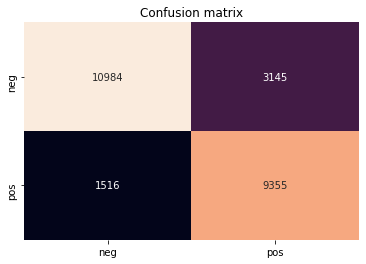

In [266]:
sns.heatmap(data=confusion_matrix(predicted, bin_test_labels), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

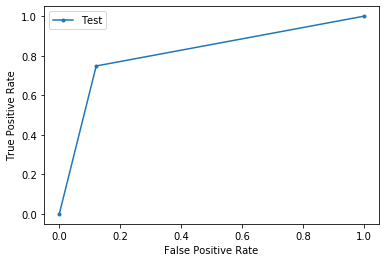

In [267]:

predicted, bin_test_labels
y_true = np.array(bin_labels)
y_predicted = predicted
fpr, tpr, _ = roc_curve(bin_test_labels, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [268]:
tp = 0
tn = 0
fp = 0
fn = 0

for pred_num in range(len(predicted)):
    if predicted[pred_num] == bin_test_labels[pred_num] and predicted[pred_num]  == 1:
      tp += 1
    elif predicted[pred_num] != bin_test_labels[pred_num] and predicted[pred_num]  == 1:
      fp += 1 
    elif predicted[pred_num] == bin_test_labels[pred_num] and predicted[pred_num]  == 0:
      tn +=1
    elif predicted[pred_num] != bin_test_labels[pred_num] and predicted[pred_num]  == 0: 
      fn +=1
print('tp', tp,'fp', fp,'tn', tn,'fn', fn)

tp 9355 fp 1516 tn 10984 fn 3145


In [269]:
my_pr = tp/(tp + fp)
my_rec = tp/(tp + fn)
my_acc = (tp+tn)/(tp+tn+fp+fn)
my_f1 = (2*my_pr*my_rec)/(my_pr + my_rec)

print('my_acc={0:1.4f}'.format(my_acc))
print('F1={0:1.4f}, P={1:1.4f}, R={2:1.4f}'.format(my_f1, my_pr, my_rec))

my_acc=0.8136
F1=0.8006, P=0.8605, R=0.7484


In [341]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts, bin_labels)
predicted = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [271]:
acc = accuracy_score(bin_test_labels, predicted)
micro_f1 = f1_score(bin_test_labels, predicted, average = None)
micro_p = precision_score(bin_test_labels, predicted, average = None)
micro_r = recall_score(bin_test_labels, predicted, average = None)
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1[-1], micro_p[-1], micro_r[-1]))

acc=0.8648
micro F1=0.8638, micro P=0.8704, micro R=0.8574


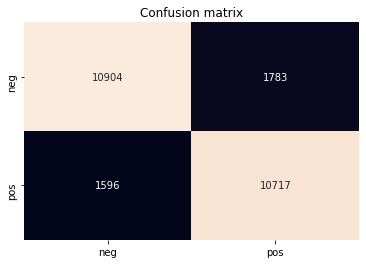

In [272]:
sns.heatmap(data=confusion_matrix(predicted, bin_test_labels), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

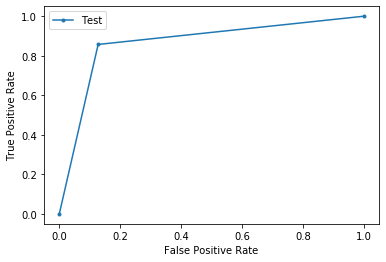

In [273]:

predicted, bin_test_labels
y_true = np.array(bin_labels)
y_predicted = predicted
fpr, tpr, _ = roc_curve(bin_test_labels, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [274]:
tp = 0
tn = 0
fp = 0
fn = 0

for pred_num in range(len(predicted)):
    if predicted[pred_num] == bin_test_labels[pred_num] and predicted[pred_num]  == 1:
      tp += 1
    elif predicted[pred_num] != bin_test_labels[pred_num] and predicted[pred_num]  == 1:
      fp += 1 
    elif predicted[pred_num] == bin_test_labels[pred_num] and predicted[pred_num]  == 0:
      tn +=1
    elif predicted[pred_num] != bin_test_labels[pred_num] and predicted[pred_num]  == 0: 
      fn +=1
print('tp', tp,'fp', fp,'tn', tn,'fn', fn)

tp 10717 fp 1596 tn 10904 fn 1783


In [275]:
my_pr = tp/(tp + fp)
my_rec = tp/(tp + fn)
my_acc = (tp+tn)/(tp+tn+fp+fn)
my_f1 = (2*my_pr*my_rec)/(my_pr + my_rec)

print('my_acc={0:1.4f}'.format(my_acc))
print('F1={0:1.4f}, P={1:1.4f}, R={2:1.4f}'.format(my_f1, my_pr, my_rec))

my_acc=0.8648
F1=0.8638, P=0.8704, R=0.8574


Эта модель, похоже, имеет лучший результат. Посчитаю на ней 15 лучших и худших фильмов.

In [0]:
from collections import Counter
score_dict = Counter()
scores = clf.decision_function(X_test)
for i in range(len(scores)):
  score_dict[scores[i]] = test_texts[i]

In [345]:
#худшие
for scores in sorted(score_dict.keys())[:15]:
  print(scores, score_dict[scores][:50], "...")


-57.465140288455395 Rose  Does anything actually happen in this episo ...
-56.40336258617259 Plankton, or Creatures from the Abyss as I'm posit ...
-55.127574246035906 Snake Island is one of those films that, whilst on ...
-53.244331303688014 Interferencia starts as unemployed Martin Sanders  ...
-51.93151863223836 Mom begins at night in the middle of nowhere, at w ...
-50.886817419279566 Komodo vs. Cobra starts as 'One Planet' environmen ...
-49.89044214521699 ...the first? Killjoy 1. But here's the review of  ...
-49.427564911076665 The Bone Collector is set in New York City & start ...
-49.10573562987044 I remember seeing the very first trailer for Under ...
-48.6273935518333 My qualifications for this review? I own all the A ...
-47.34316462152325 All I could think while watching this movie was: " ...
-47.02176783938232 Okay wait let me get this street, there are actual ...
-45.85404138093768 There really are no redeeming factors about this s ...
-45.31188665862126 It is the early

In [346]:
#лучшие
for scores in sorted(score_dict.keys())[-15:]:
  print(scores, score_dict[scores][:50], "...")

34.10555142629135 Many years ago I saw this movie (on television may ...
34.601481317733594 This is a surprisingly great low budget Horror/Com ...
35.15024954169033 I have never been a great fan of Oliver Stone, oft ...
35.87817703337953 Anthony Minghella's 'The English Patient' is a fil ...
35.93773157639753 1983 was "the battle of the Bonds". That year both ...
36.158191493759844 Looking back at the career of Alfred Hitchcock, it ...
36.642378073308535 Wallace and Gromit are the main characters in some ...
37.600075490130926 Life is comprised of infinite possibilities; some  ...
38.649654122388064 Director Mikhail Kalatozov's film The Cranes are F ...
41.373891489537066 1904. The North African nation of Morocco is hangi ...
41.58785727705606 The Hand of Death aka Countdown in Kung Fu (1976)  ...
43.2911872956368 This is a great German slasher, that's often quite ...
44.44538969732855 Universal Studios version of "Flipper" (1996) is a ...
46.25884347586908 OZ is the greatest show ever

In [296]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_counts, bin_labels)
predicted = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [297]:
acc = accuracy_score(bin_test_labels, predicted)
micro_f1 = f1_score(bin_test_labels, predicted, average = None)
micro_p = precision_score(bin_test_labels, predicted, average = None)
micro_r = recall_score(bin_test_labels, predicted, average = None)
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1[-1], micro_p[-1], micro_r[-1]))

acc=0.8457
micro F1=0.8441, micro P=0.8532, micro R=0.8352


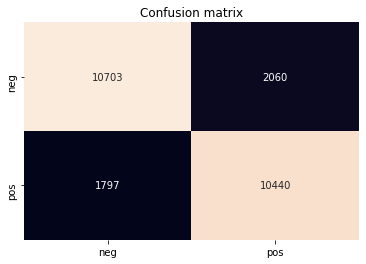

In [298]:
sns.heatmap(data=confusion_matrix(predicted, bin_test_labels), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

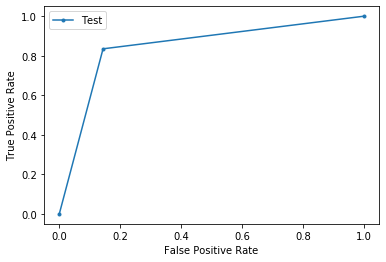

In [299]:

predicted, bin_test_labels
y_true = np.array(bin_labels)
y_predicted = predicted
fpr, tpr, _ = roc_curve(bin_test_labels, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [300]:
tp = 0
tn = 0
fp = 0
fn = 0

for pred_num in range(len(predicted)):
    if predicted[pred_num] == bin_test_labels[pred_num] and predicted[pred_num]  == 1:
      tp += 1
    elif predicted[pred_num] != bin_test_labels[pred_num] and predicted[pred_num]  == 1:
      fp += 1 
    elif predicted[pred_num] == bin_test_labels[pred_num] and predicted[pred_num]  == 0:
      tn +=1
    elif predicted[pred_num] != bin_test_labels[pred_num] and predicted[pred_num]  == 0: 
      fn +=1
print('tp', tp,'fp', fp,'tn', tn,'fn', fn)

tp 10440 fp 1797 tn 10703 fn 2060


In [301]:
my_pr = tp/(tp + fp)
my_rec = tp/(tp + fn)
my_acc = (tp+tn)/(tp+tn+fp+fn)
my_f1 = (2*my_pr*my_rec)/(my_pr + my_rec)

print('my_acc={0:1.4f}'.format(my_acc))
print('F1={0:1.4f}, P={1:1.4f}, R={2:1.4f}'.format(my_f1, my_pr, my_rec))

my_acc=0.8457
F1=0.8441, P=0.8532, R=0.8352


In [0]:

from collections import Counter
score_dict = Counter()
scores = clf.decision_function(X_test)
for i in range(len(scores)):
  score_dict[scores[i]] = test_texts[i]

In [302]:

docs_new = ['God is love',  'stupid movie', 'who even wants to watch it?', 'nice film']
X_new_counts = count_vect.transform(docs_new)
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, categories[category]))

God is love => pos
stupid movie => neg
who even wants to watch it? => neg
nice film => pos


In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, bin_labels)

In [0]:
predicted = clf.predict(X_test)
predicted_proba = clf.predict_proba(X_test)

In [295]:
predicted_proba

array([[0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       ...,
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4]])